In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

from scipy.stats import binom
from scipy.stats import beta

# Changing plot sizes
pylab.rcParams['figure.figsize'] = (10, 5)

# Exercise 2

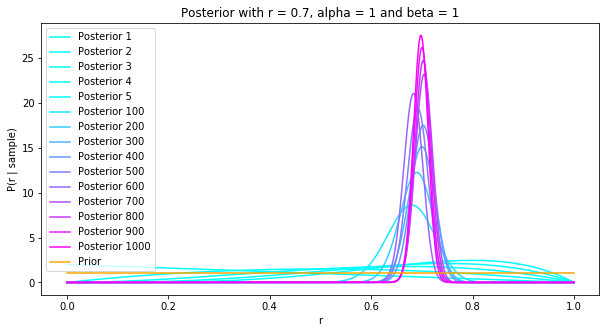

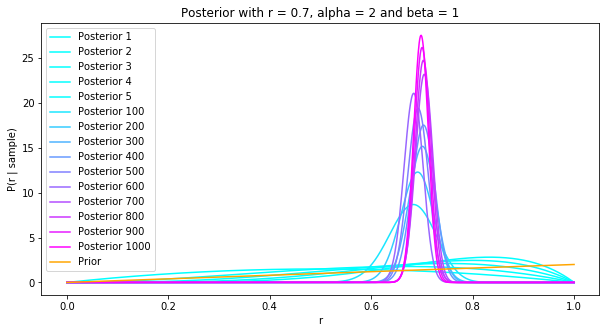

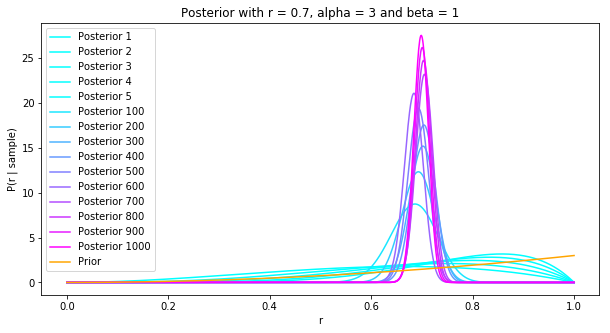

In [5]:
np.random.seed(4243)

# This function has been taken from the lecture slides
def prior(x, prior_alpha, prior_beta):
    return beta.pdf(x, prior_alpha, prior_beta)

# This function has been taken from the lecture slides
def posterior(x, prior_alpha, prior_beta, sample):
    N = len(sample)
    y_N = sum(sample)
    delta = y_N + prior_alpha
    gamma = N - y_N + prior_beta
    return beta.pdf(x, delta, gamma)

# This function has been taken from the lecture slides
def draw_sample(r, num):
    return np.random.binomial(1,r,num)

# Parts of this code has been taken from
# lecture slides and adapted for my use
def plotPrior(alpha, pbeta, accuracy):
    xsamples = np.linspace(0,1,accuracy+1)
    PriorVals = prior(xsamples, alpha, pbeta)
    
    plt.plot(xsamples, PriorVals, color = 'orange', label="Prior")
    plt.legend()
    return PriorVals

# Parts of this code has been taken from
# lecture slides and adapted for my use
def plotPosterior(alpha, pbeta, r, iterations, sample, frequency):
    xsamples = np.linspace(0,1,1000)
    PosteriorVals = np.zeros([iterations, len(xsamples)])
    PlottedSampleSizes = np.arange(1,iterations+1,1)
    colors = colors = cm.cool(np.linspace(0,1,np.max(PlottedSampleSizes)+1))
    
    for i in range(iterations):
        PosteriorVals[i,:] = posterior(xsamples, alpha, pbeta, sample[:i+1])

    for i in PlottedSampleSizes:
        if (i%frequency == 0 or i <= 5):
            plt.plot(xsamples, PosteriorVals[i-1,:], color=colors[i], label = f'Posterior {i}')
   
    plt.xlabel('r')
    plt.ylabel('P(r | sample)')
    plt.title(f'Posterior with r = {r}, alpha = {alpha} and beta = {pbeta}')
    return PosteriorVals

alpha = 1
pbeta = 1
prob = 0.7
n_sample = 1000
frequency = 100

sample = draw_sample(prob,n_sample)
plotPosterior(alpha, pbeta, prob, n_sample, sample, frequency)
plotPrior(alpha, pbeta, n_sample)
plt.show()

alpha = 2
plotPosterior(alpha, pbeta, prob, n_sample, sample, frequency)
plotPrior(alpha, pbeta, n_sample)
plt.show()

alpha = 3
plotPosterior(alpha, pbeta, prob, n_sample, sample, frequency)
plotPrior(alpha, pbeta, n_sample)
plt.show()

# Exercise 3

In [6]:
data = np.loadtxt("men-olympics-100.txt")
usedata = np.array([data[:,1],data[:,2],data[:,3]]).T

mu0 = np.array([0,0])
Sigma0 = np.array([[100,0],[0,5]])
sigmaSquared = 10

def myposterior(X, y, mu0, Sigma0, sigmaSquared):
    sigmaw = np.linalg.inv(1/sigmaSquared*np.dot(X.T,X)+np.linalg.inv(Sigma0))
    muw = np.dot(sigmaw, np.dot(X.t,y) + np.linalg.inv(Sigma0)*mu0)
    return muw, sigmaw
